In [1]:
%load_ext autoreload
%reload_ext autoreload
import pickle
import numpy as np
import matplotlib.pyplot as plt
from eval_utils import *
from video_utils import *
from load_utils import *


data_path = '../../AICity_data/train/S03/c010/'

In [2]:
gt_detect = readDetectionsXML('ai_challenge_s03_c010-full_annotation.xml')
gt_notParked = getNotParkedCars(gt_detect)

In [14]:
fasterRCNN_50FPN_detections = {}
with open('fasterRCNN_50FPN_detections.pkl','rb') as openFile:
    fasterRCNN_50FPN_detections = pickle.load(openFile)

fasterRCNN_X_101_detections = {}
with open('fasterRCNN_X_101_detections.pkl','rb') as openFile:
    fasterRCNN_X_101_detections = pickle.load(openFile)

retinanet_101_detections = {}
with open('retinanet_101_detections.pkl','rb') as openFile:
    retinanet_101_detections = pickle.load(openFile)

maskRCNN_101_detections = {}
with open('maskRCNN_101_detections.pkl','rb') as openFile:
    maskRCNN_101_detections = pickle.load(openFile)

maskRCNN_50FPN_detections = {}
with open('maskRCNN_50FPN_detections.pkl','rb') as openFile:
    maskRCNN_50FPN_detections = pickle.load(openFile)

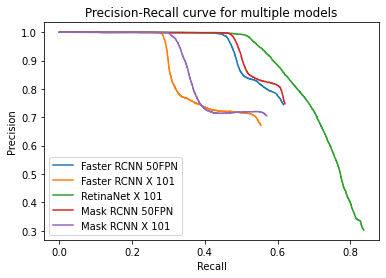

['Faster RCNN 50FPN 0.6028749815752368', 'Faster RCNN X 101 0.48549964645530114', 'RetinaNet X 101 0.7269164911567646', 'Mask RCNN 50FPN 0.6116565709149137', 'Mask RCNN X 101 0.495293220949543']


In [16]:
rec1, prec1, ap1, tp_gauss1, IoU_tp1, IoU1 = voc_eval(gt_detect, fasterRCNN_50FPN_detections, 0.5, True)
rec2, prec2, ap2, tp_gauss2, IoU_tp2, IoU2 = voc_eval(gt_detect, fasterRCNN_X_101_detections, 0.5, True)
rec3, prec3, ap3, tp_gauss3, IoU_tp3, IoU3 = voc_eval(gt_detect, retinanet_101_detections, 0.5, True)
rec4, prec4, ap4, tp_gauss4, IoU_tp4, IoU4 = voc_eval(gt_detect, maskRCNN_50FPN_detections, 0.5, True)
rec5, prec5, ap5, tp_gauss5, IoU_tp5, IoU5 = voc_eval(gt_detect, maskRCNN_101_detections, 0.5, True)
plot_multiple_prec_recall_curves([prec1, prec2, prec3, prec4, prec5],
            [rec1, rec2, rec3, rec4, rec5],
            ['Faster RCNN 50FPN', 'Faster RCNN X 101', 'RetinaNet X 101', 'Mask RCNN 50FPN', 'Mask RCNN X 101'],
            'Precision-Recall curve for multiple models')

print(['Faster RCNN 50FPN ' + str(ap1), 'Faster RCNN X 101 ' + str(ap2), 'RetinaNet X 101 ' + str(ap3), 
        'Mask RCNN 50FPN ' + str(ap4), 'Mask RCNN X 101 ' +str(ap5)])

In [ ]:
generate_videoBB_comparison(data_path + 'vdo.avi', gt_detect, model_detections, 'gaussDetector1500-2000', 1500, 2140)

In [15]:
total_frames = 2141
initial_frame = 535

gt_acummulative = {}
acummulative_ap = []
for frame in range(initial_frame, total_frames):
    sframe = str(frame)
    if sframe in gt_notParked:
        gt_acummulative[sframe] = gt_notParked[sframe]

    recs, precs, aps = ap_wo_conf(gt_acummulative,bestModel)
    acummulative_ap.append(np.mean(aps))



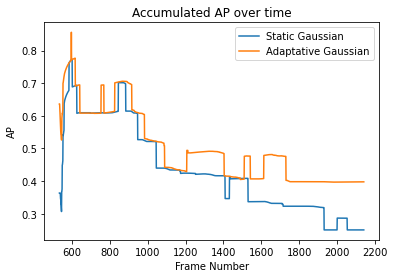

In [18]:
plot_multiple_prec_recall_curves([acummulative_ap,task2],[list(range(initial_frame,total_frames)), list(range(initial_frame,total_frames))], ['Static Gaussian', 'Adaptative Gaussian'], 'Accumulated AP over time','Frame Number', 'AP')